# **Individual Formative assignment January 2025**

## Objectives

* Design and implement an ETL pipeline using Python.
* Visualise data using Matplotlib, Seaborn, and Plotly.
* Adhere to the key milestones and deliverables.
* Maximise future maintainability through documentation, code structure, and organisation.
* Document and present the project process and outcomes.
* Demonstrate and document the development process through a version control system such as GitHub.

Based of the Retail Sales Data Analysis Project Example.  

* Data analysis goals:  
Analyse retail sales data to identify trends, insights, and the impact of promotional markdowns on sales.  
Provide comprehensive, visually appealing sales reports and insights to assist in strategic decision-making.

Context:  

The challenge involves making decisions based on limited historical data, particularly around holidays and promotional events.  
The dataset includes historical sales data for 45 stores in different regions, with details about store types, sizes, and promotional markdowns.  

*  Potential features to include:  
ETL Pipeline:  
    Extract: Load data from the Excel sheets (Stores, Features, Sales).  
    Transform: Clean the data, handle missing values, and create new features such as sales differences between holiday and non-holiday weeks.  
    Load: Store the transformed data in a format suitable for analysis (e.g., a cleaned DataFrame).  
Data Visualisation:  
    Descriptive Statistics: Display basic statistics such as average sales per store and department.  
    Trend Analysis: Plot sales trends over time for different stores and departments.  
    Impact Analysis: Visualise the impact of markdowns on sales during holidays versus non-holiday periods.  
    Comparative Analysis: Compare sales performance across different stores and regions.  

## Inputs

* Data source: https://www.kaggle.com/datasets/manjeetsingh/retaildataset 


## Outputs

* This notebook will be the combined output for the 2 day assignment

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [13]:
import os
os.chdir('/workspace/CI_DA_Project_Jan2025_pg')
current_dir = os.getcwd()
current_dir

'/workspace/CI_DA_Project_Jan2025_pg'

# ETL - Step 1 data load

Section 1 - setup and import relevant modules

In order to undertake the required tasks the following python modules will be loaded into the Jupyter notebook.


import numpy as np
import pandas as pd
import datetime as dt
import math
import seaborn as sns


In [14]:
# load ETL Modules
import numpy as np
import pandas as pd
import datetime as dt
import math
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Load Original Data

In [15]:
sales_df = pd.read_csv('sales_data-set.csv')
stores_df=  pd.read_csv('stores_data-set.csv')
features_df = pd.read_csv('Features_data_set.csv')

# Starting with sales_df

Review data and enhance it for analysis

In [16]:
#Headline data for 
Columns = ['Date', 'Dept', 'Store', 'Weekly_Sales', 'IsHoliday']

sales_sum_df = pd.DataFrame({
    'DataType': sales_df[Columns].dtypes,
    'UniqueValues': sales_df[Columns].nunique(),
    'RowsWithData': len(sales_df[Columns])-sales_df[Columns].isnull().sum(),
    'NullValues':sales_df[Columns].isnull().sum(),
    'SkewScore':sales_df[Columns].skew(),
    'Kurtosis':sales_df[Columns].kurtosis()
})
sales_sum_df


DataType  UniqueValues  RowsWithData  NullValues  SkewScore  \
Date           object           143        421570           0        NaN   
Dept            int64            81        421570           0   0.358223   
IsHoliday        bool             2        421570           0   3.359867   
Store           int64            45        421570           0   0.077763   
Weekly_Sales  float64        359464        421570           0   3.262008   

               Kurtosis  
Date                NaN  
Dept          -1.215571  
IsHoliday      9.288747  
Store         -1.146503  
Weekly_Sales  21.491290

In [17]:
sales_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

## Measures - Sales_data-set.csv

This data set contain the following data elements, there are no Nulls in the data so there is no need for cleansing of Null.  
The date field is not in date format = this needs to be changed.  

sales_data-set.csv  
    Date - Start/end date of week the data is relevant to  
    Store - The store number the data is relevant to - 45 unique stores  
    Dept - The Department within the store that the data is relevant to - 73 unique departments  
    Weekly_sales - Total Weekly Sales for the department and store  
    Is_Holiday = True/False flag that week contained holiday dates  

In [18]:
# Change date to date format and create year/month and week fields and YearMonth YearWeek
# convert Received date to Date Format
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
# Append Year column
sales_df['SalesYear'] = round(sales_df['Date'].dt.year)
# Append Month column 
sales_df['SalesMonth'] = round(sales_df['Date'].dt.month)
# Append Week column
sales_df['SalesWeek'] = round(sales_df['Date'].dt.week)
# Create YearMonth Column
sales_df['SalesYearMonth'] = round(sales_df['SalesYear']*100 +sales_df['SalesMonth'])
# Create YearWeek Column
sales_df['SalesYearWeek'] = round(sales_df['SalesYear']*100 +sales_df['SalesWeek'])


## Full Measures - Sales_data-set.csv

Measures now available  

sales_data-set.csv  
    Date - Start/end date of week the data is relevant to.  
    Store - The store number the data is relevant to - 45 unique stores.  
    Dept - The Department within the store that the data is relevant to - 73 unique departments.  
    Weekly_sales - Total Weekly Sales for the department and store.  
    Is_Holiday = True/False flag that week contained holiday dates.  
    SalesYear = Year the sale was made.  
    SalesMonth - Month the sale was made.  
    SalesWeek - Week the sale was made.  
    SalesYearMonth - Year and Month the sale was made.  
    SalesYearWeek - Year and Week the sale was made.  

In [19]:
import matplotlib.pyplot as plt

sales_df.query('SalesWeek <= 4')

Store  Dept       Date  Weekly_Sales  IsHoliday  SalesYear  \
48          1     1 2011-01-07      15984.24      False       2011   
49          1     1 2011-01-14      17359.70      False       2011   
50          1     1 2011-01-21      17341.47      False       2011   
51          1     1 2011-01-28      18461.18      False       2011   
100         1     1 2012-01-06      16567.69      False       2012   
...       ...   ...        ...           ...        ...        ...   
421478     45    98 2011-01-28         77.00      False       2011   
421527     45    98 2012-01-06        698.76      False       2012   
421528     45    98 2012-01-13        677.71      False       2012   
421529     45    98 2012-01-20        848.84      False       2012   
421530     45    98 2012-01-27        671.40      False       2012   

        SalesMonth  SalesWeek  SalesYearMonth  SalesYearWeek  
48               1          1          201101         201101  
49               1          2          201101         201102  
50               1          3          201101         201103  
51               1          4          201101         201104  
100              1          1          201201         201201  
...            ...        ...             ...            ...  
421478           1          4          201101         201104  
421527           1          1          201201         201201  
421528           1          2          201201         201202  
421529           1          3          201201         201203  
421530           1          4          201201         201204  

[23545 rows x 10 columns]

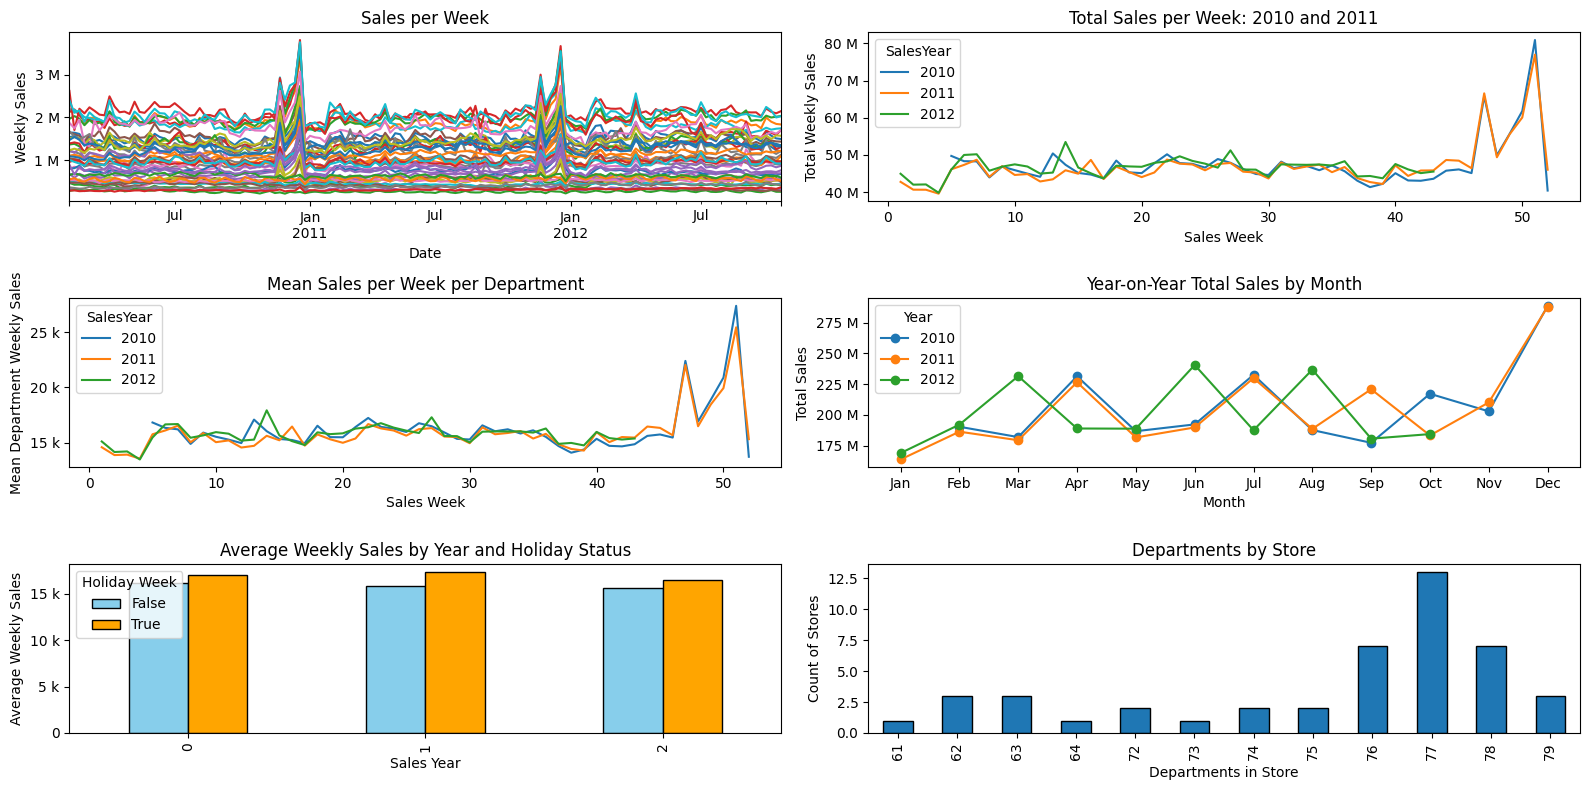

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

# First graph: Weekly sales over time
sales_df.groupby(['Store', 'Date' ]).Weekly_Sales.sum().unstack(level=0).plot(
    kind='line',
    linestyle='solid',
    legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Sales per Week')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Weekly Sales')
axes[0, 0].yaxis.set_major_formatter(ticker.EngFormatter())


# Second graph: Total sales per week aggregated by SalesWeek
sales_df.groupby(['SalesYear', 'SalesWeek']).Weekly_Sales.sum().unstack(level=0).plot(
    kind='line',
    linestyle='solid',
    legend=True,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Total Sales per Week: 2010 and 2011')
axes[0, 1].set_xlabel('Sales Week')
axes[0, 1].set_ylabel('Total Weekly Sales')
axes[0, 1].yaxis.set_major_formatter(ticker.EngFormatter())
axes[0, 1].xaxis.set_major_formatter(ticker.EngFormatter())

# Third graph: Mean sales per week aggregated by SalesWeek
sales_df.groupby(['SalesYear', 'SalesWeek']).Weekly_Sales.mean().unstack(level=0).plot(
    kind='line',
    linestyle='solid',
    legend=True,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Mean Sales per Week per Department')
axes[1, 0].set_xlabel('Sales Week')
axes[1, 0].set_ylabel('Mean Department Weekly Sales')
axes[1, 0].yaxis.set_major_formatter(ticker.EngFormatter())
axes[1, 0].xaxis.set_major_formatter(ticker.EngFormatter())

# Fourth graph: Year-on-year comparison of sales
# Group data by year and month, then aggregate sales
monthly_sales = sales_df.groupby(['SalesYear', 'SalesMonth']).Weekly_Sales.sum().unstack(level=0)

# Plot one line per year
monthly_sales.plot(
    kind='line',
    ax=axes[1, 1],
    linestyle='solid',
    marker='o'  # Optional: Adds markers to the line
)

# Update x-axis with month names
axes[1, 1].set_xticks(range(1, 13))  # Months range from 1 to 12
axes[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1, 1].yaxis.set_major_formatter(ticker.EngFormatter())

# Add title and labels
axes[1, 1].set_title('Year-on-Year Total Sales by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Total Sales')

# Add legend for years
axes[1, 1].legend(title='Year', loc='upper left')

# Fifth graph: Holiday vs Non Holiday
# Group data by year and Holiday, then aggregate sales
monthly_sales2 = sales_df.groupby(['IsHoliday', 'SalesYear']).Weekly_Sales.mean().unstack(level=0)

monthly_sales2.plot(
    kind='bar',
    ax=axes[2,0],
    color=['skyblue', 'orange'],  # Optional: Custom colors for bars
    edgecolor='black'            # Adds a border to the bars
)

# Add title and labels
axes[2,0].set_title('Average Weekly Sales by Year and Holiday Status')
axes[2,0].set_xlabel('Sales Year')
axes[2,0].set_ylabel('Average Weekly Sales')
axes[2,0].legend(title='Holiday Week', loc='upper left')
axes[2,0].yaxis.set_major_formatter(ticker.EngFormatter())
axes[2,0].xaxis.set_major_formatter(ticker.EngFormatter())

# Sixth graph: Count Departments
# Group data by year and Holiday, then aggregate sales
dept_per_store = sales_df.groupby('Store')['Dept'].nunique()
stores_with_same_no_dept = dept_per_store.value_counts()
stores_with_same_no_dept.sort_index().plot(
    kind='bar',
    x='Dept',
    ax=axes[2,1],
    legend=False,
    edgecolor='black'            # Adds a border to the bars
)

# Add title and labels
axes[2,1].set_title('Departments by Store')
axes[2,1].set_xlabel('Departments in Store')
axes[2,1].set_ylabel('Count of Stores')

# Display the plots
plt.tight_layout()
plt.show()

Lets see box and whisker charts by store

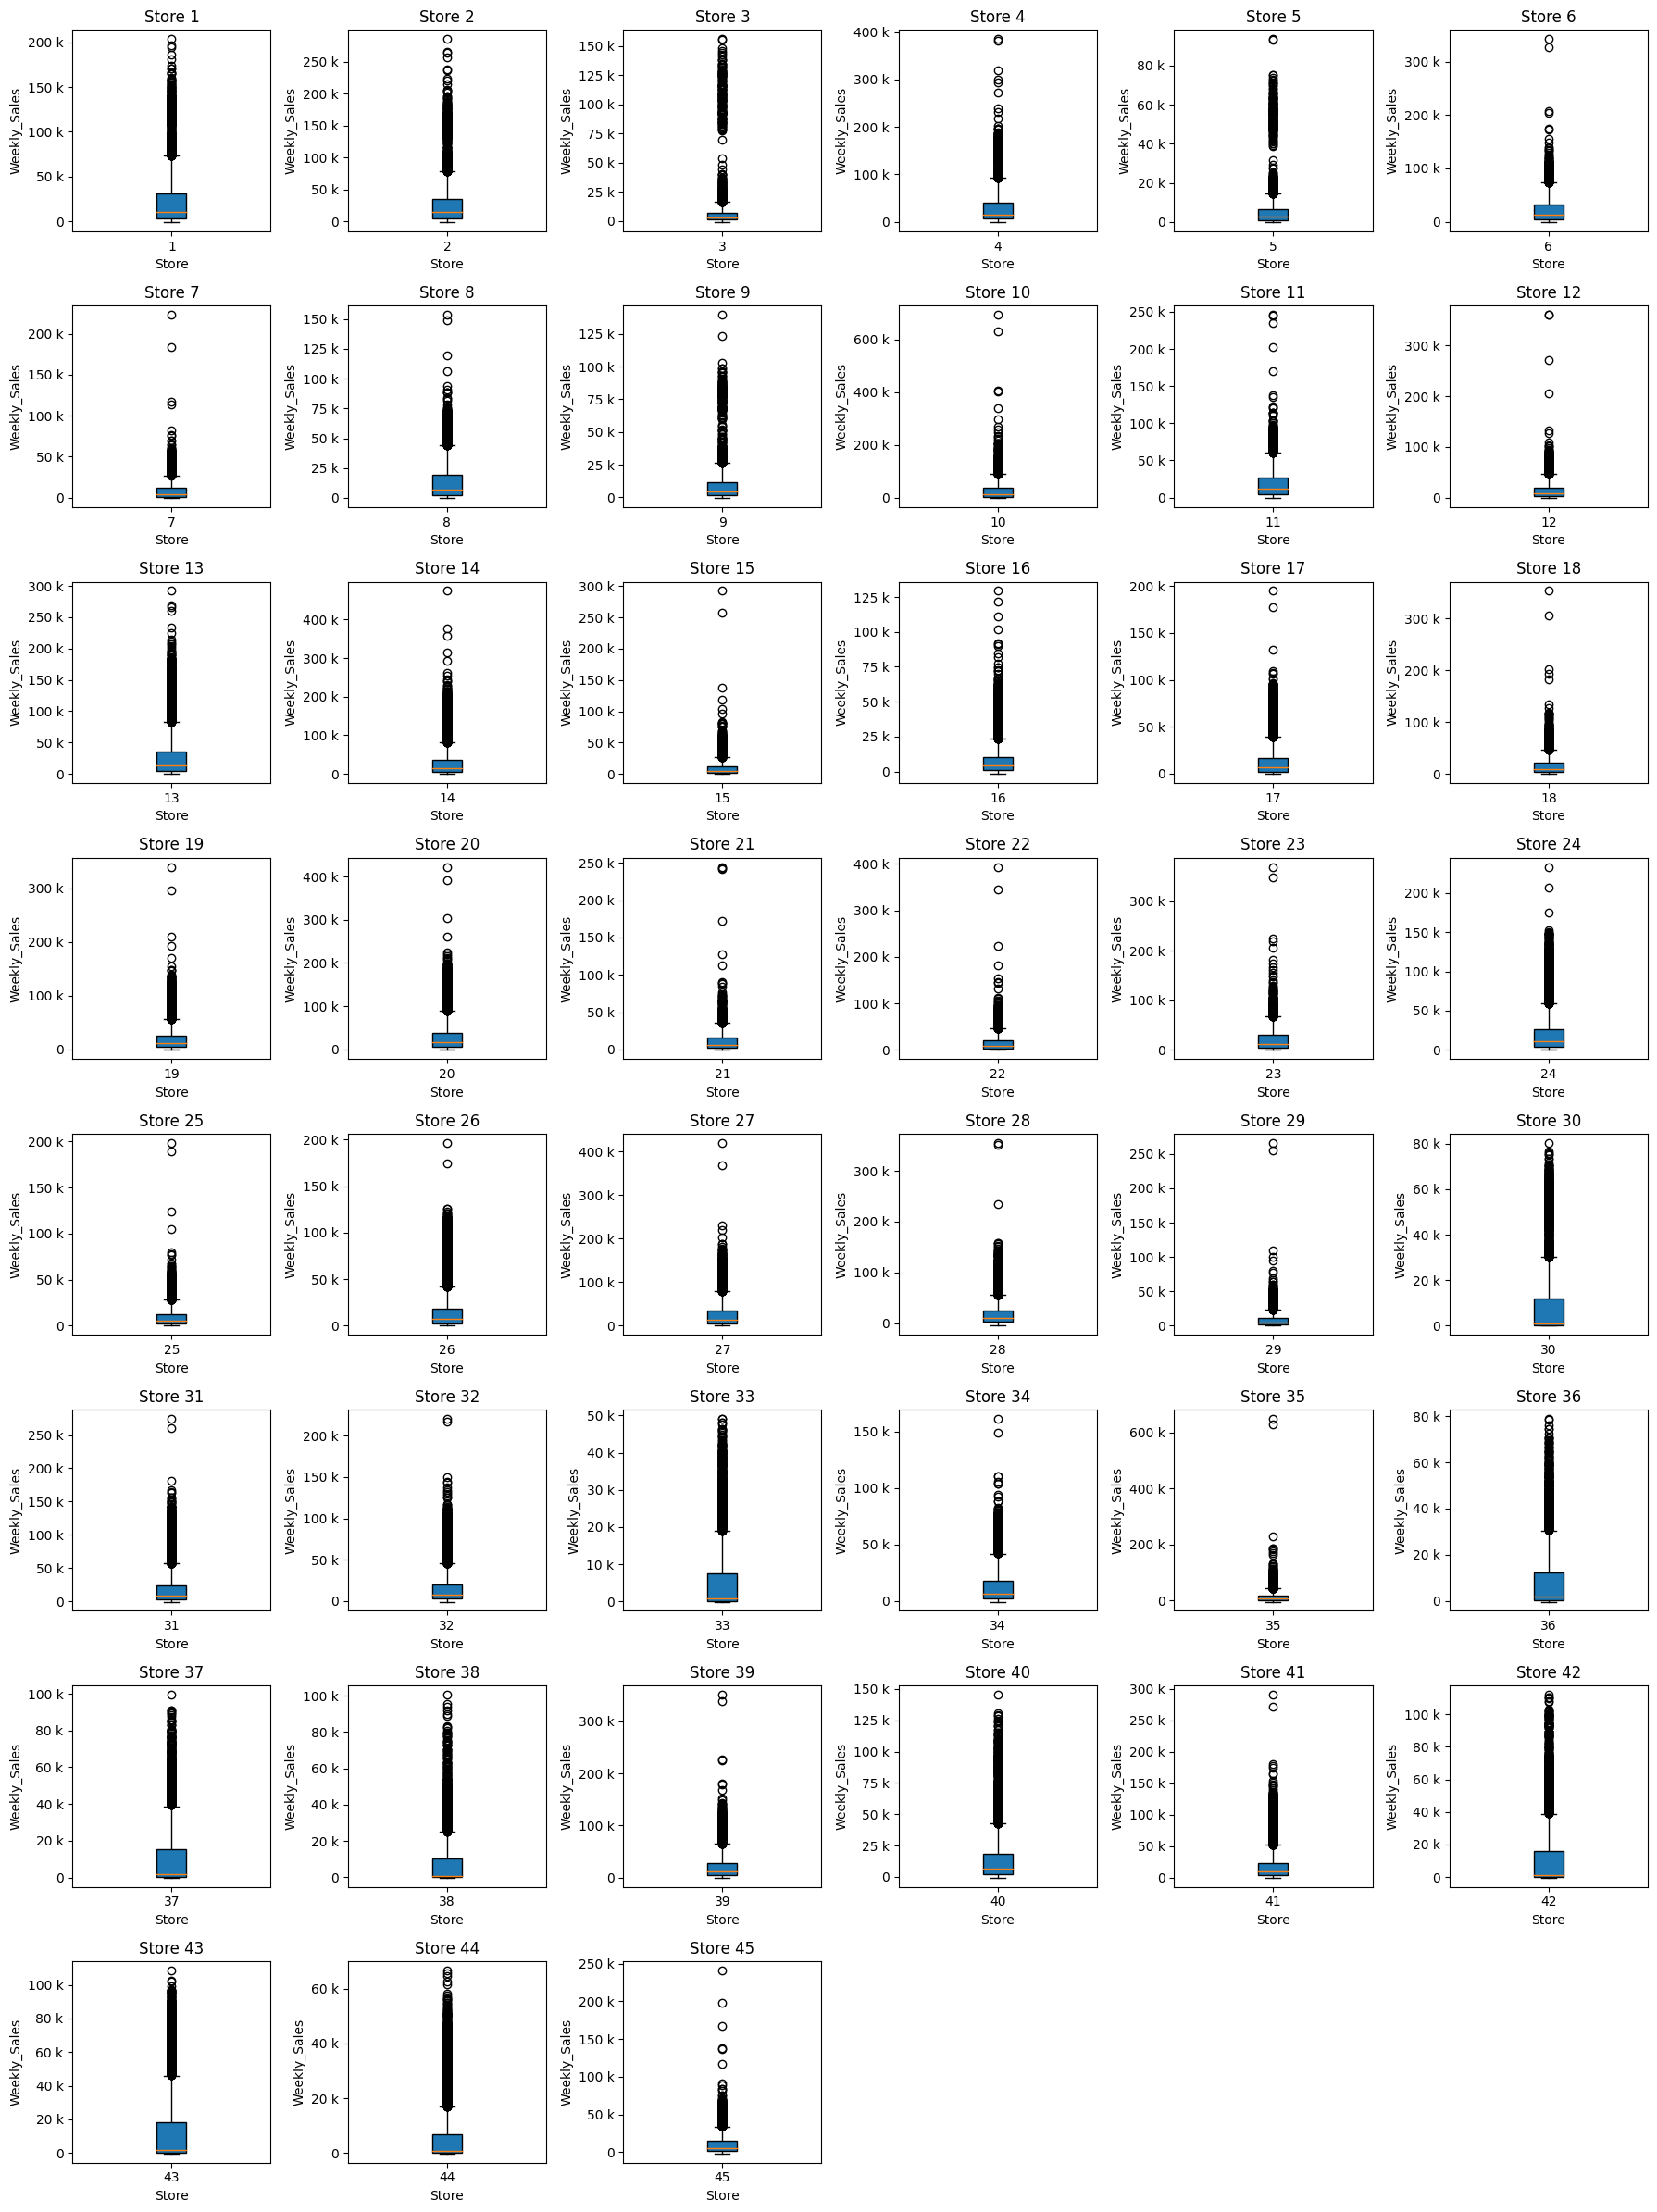

In [22]:
# Get unique values in Store
unique_groups = sales_df['Store'].unique()
# Number of plots per row
plots_per_row = 6

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in Store and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = sales_df.loc[sales_df['Store'] == group, 'Weekly_Sales'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Store {group}')
    axes[idx].set_ylabel('Weekly_Sales')
    axes[idx].set_xlabel('Store')
    axes[idx].yaxis.set_major_formatter(ticker.EngFormatter())

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.yscale('log')
plt.tight_layout()
plt.show()

## Observations on Sales_data-set.csv

The data does not contain 3 complete years, it runs from Jan 2010 to October 2012.  
There is a peak in sales during December in 2010 and 2011.  
There is a corresponding drop in sales in January of 2011 and 2012.  
The 45 Stores appear to have relatively similar sales patterns across the year, although the Size of those sales does vary between store, this is evidently driven by a different factor. 
 This observation is backed up by the variations shown in the Box and Whisker plots by store.  
 Stores received increased sales during holiday weeks on average than during non holiday weeks.  
 Number of deparments varies across Stores from 61 to 79, with most having 77 departments.  No stores have 65-71 departments. 

# Lets look at the other data sets 

Lets see what the Features and Stores data sets add

In [23]:
#Headline data for 
print(features_df.describe())
features_sum_df = pd.DataFrame({
    'DataType': features_df.dtypes,
    'UniqueValues': features_df.nunique(),
    'RowsWithData': len(features_df)-features_df.isnull().sum(),
    'NullValues': features_df.isnull().sum(),
    'SkewScore': features_df.skew(),
    'Kurtosis': features_df.kurtosis()
})
features_sum_df

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

DataType  UniqueValues  RowsWithData  NullValues  SkewScore  \
CPI           float64          2505          7605         585   0.067668   
Date           object           182          8190           0        NaN   
Fuel_Price    float64          1011          8190           0  -0.305063   
IsHoliday        bool             2          8190           0   3.328811   
MarkDown1     float64          4023          4032        4158   4.016436   
MarkDown2     float64          2715          2921        5269   4.962258   
MarkDown3     float64          2885          3613        4577   8.133806   
MarkDown4     float64          3405          3464        4726   4.864485   
MarkDown5     float64          4045          4050        4140  50.277824   
Store           int64            45          8190           0   0.000000   
Temperature   float64          4178          8190           0  -0.283384   
Unemployment  float64           404          7605         585   1.067685   

                 Kurtosis  
CPI             -1.832113  
Date                  NaN  
Fuel_Price      -0.952388  
IsHoliday        9.083200  
MarkDown1       23.687167  
MarkDown2       32.342187  
MarkDown3       72.068075  
MarkDown4       29.000294  
MarkDown5     2923.056530  
Store           -1.201186  
Temperature     -0.610884  
Unemployment     2.498221

## Full Measures - Features_data_set.csv

Measures now available  

Features_data_set.csv
   CPI - Measure of average change over time in prices with 1980 being the base at 100 - 211 means prices are 111% greater than in 1980  
   Date - Start/end date of week the data is relevant to.    
   Fuel_Price - Average Price of fuel per gallon in week  
   IsHoliday - True/False flag showing weeks with a holiday date.  
   MarkDown1 - Value of discounts applied to a product during the period at the identified store  
   MarkDown2 - Value of discounts applied to a product during the period at the identified store  
   MarkDown3 - Value of discounts applied to a product during the period at the identified store  
   MarkDown4 - Value of discounts applied to a product during the period at the identified store  
   MarkDown5 - Value of discounts applied to a product during the period at the identified store  
   Store - Store unique identifier  
   Temperature - Average temperature during period  
   Unemployment - Reported Unemployment rate for period.  

There are Nulls in Markdown, CPI and Unemployment.

CPI and Unemployment are Government measures - the FillNA fill forward method will be used for these  
Markdown is a stated figure of discounts - NaN means no discounts applied - so NaN will be filled with 0.


In [24]:

# Replace NaN in MarkDown as 0
features_df['MarkDown1'] = features_df['MarkDown1'].fillna(0)
features_df['MarkDown2'] = features_df['MarkDown2'].fillna(0)
features_df['MarkDown3'] = features_df['MarkDown3'].fillna(0)
features_df['MarkDown4'] = features_df['MarkDown4'].fillna(0)
features_df['MarkDown5'] = features_df['MarkDown5'].fillna(0)
features_df['MarkDownTotal']= features_df['MarkDown1']+features_df['MarkDown2']+features_df['MarkDown3']+features_df['MarkDown4']+features_df['MarkDown5']
features_df['MarkDownData']= features_df['MarkDownTotal']>0
# Use fillna forward on Unemployment and CPI
features_df['CPI']=features_df['CPI'].fillna(method='ffill')
features_df['Unemployment']=features_df['Unemployment'].fillna(method='ffill')

# re run summary
features_pc_sum_df = pd.DataFrame({
    'DataType': features_df.dtypes,
    'UniqueValues': features_df.nunique(),
    'RowsWithData': len(features_df)-features_df.isnull().sum(),
    'NullValues': features_df.isnull().sum(),
    'SkewScore': features_df.skew(),
    'Kurtosis': features_df.kurtosis()
})
features_pc_sum_df

# 

DataType  UniqueValues  RowsWithData  NullValues  SkewScore  \
CPI            float64          2505          8190           0   0.069261   
Date            object           182          8190           0        NaN   
Fuel_Price     float64          1011          8190           0  -0.305063   
IsHoliday         bool             2          8190           0   3.328811   
MarkDown1      float64          4024          8190           0   5.018897   
MarkDown2      float64          2715          8190           0   8.346798   
MarkDown3      float64          2885          8190           0  12.384021   
MarkDown4      float64          3406          8190           0   7.258351   
MarkDown5      float64          4046          8190           0  67.033277   
MarkDownData      bool             2          8190           0   0.022961   
MarkDownTotal  float64          4049          8190           0  10.796101   
Store            int64            45          8190           0   0.000000   
Temperature    float64          4178          8190           0  -0.283384   
Unemployment   float64           404          8190           0   1.020906   

                  Kurtosis  
CPI              -1.829348  
Date                   NaN  
Fuel_Price       -0.952388  
IsHoliday         9.083200  
MarkDown1        38.085707  
MarkDown2        91.871712  
MarkDown3       168.864347  
MarkDown4        66.476518  
MarkDown5      5415.604713  
MarkDownData     -1.999961  
MarkDownTotal   342.560281  
Store            -1.201186  
Temperature      -0.610884  
Unemployment      2.436414

In [25]:
#Headline data for 
print(stores_df.describe())
stores_sum_df = pd.DataFrame({
    'DataType': stores_df.dtypes,
    'UniqueValues': stores_df.nunique(),
    'RowsWithData': len(stores_df)-stores_df.isnull().sum(),
    'NullValues': stores_df.isnull().sum(),
    'SkewScore': stores_df.skew(),
    'Kurtosis': stores_df.kurtosis()
})
stores_sum_df

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


DataType  UniqueValues  RowsWithData  NullValues  SkewScore  Kurtosis
Size     int64            40            45           0  -0.200068 -1.372248
Store    int64            45            45           0   0.000000 -1.200000
Type    object             3            45           0        NaN       NaN

In [26]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

## Full Measures - Stores_data_set.csv

Measures available  

Stores_data_set.csv  
    Store - Store unique Id   
    Type - Store classification - choice of A, B or C  
    Size - Store floor space in Sqft.  

There are no Nulls that need cleaning.


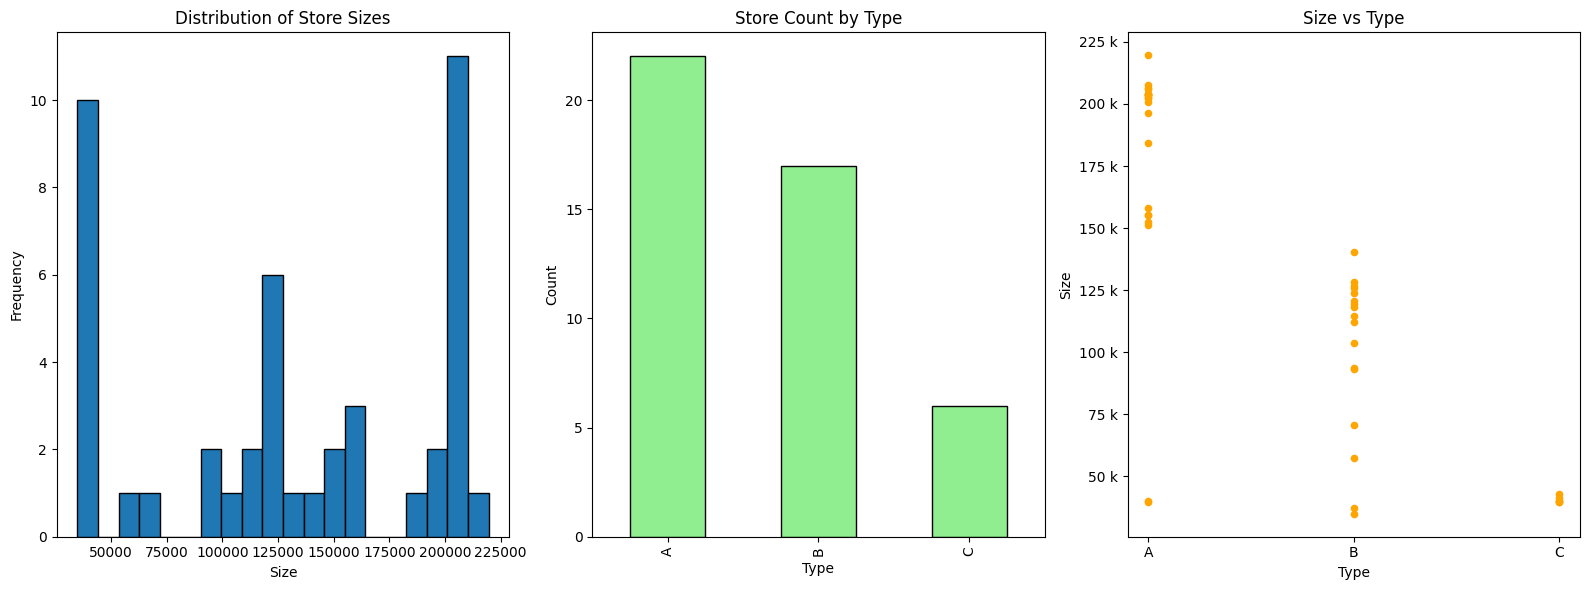

In [27]:
# Graphs from Stores - Code Corrected using ChatGpt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

stores_df['Size'].plot(kind='hist', ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title('Distribution of Store Sizes')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Frequency')

stores_df['Type'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Store Count by Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Count')

stores_df.plot(kind='scatter', x='Type', y='Size', ax=axes[2], color='orange')
axes[2].set_title('Size vs Type')
axes[2].set_xlabel('Type')
axes[2].set_ylabel('Size')
axes[2].yaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()
plt.show()

## Enhance stores data with Count of Department and see if there is a relation between type and Number of Departments.

Using the summary of department for store created earlier to produce the graph of count of stores by number of departments, the Stores_data-csv will be enhanced.

In [28]:
# merge the additional data on departments into data set so that it will be included further on
stores_df=pd.merge(stores_df, dept_per_store, how='left', on=['Store'])
stores_df

Store Type    Size  Dept
0       1    A  151315    77
1       2    A  202307    78
2       3    B   37392    72
3       4    A  205863    78
4       5    B   34875    72
5       6    A  202505    77
6       7    B   70713    76
7       8    A  155078    76
8       9    B  125833    73
9      10    B  126512    77
10     11    A  207499    78
11     12    B  112238    75
12     13    A  219622    79
13     14    A  200898    77
14     15    B  123737    79
15     16    B   57197    76
16     17    B   93188    76
17     18    B  120653    78
18     19    A  203819    79
19     20    A  203742    78
20     21    B  140167    77
21     22    B  119557    76
22     23    B  114533    77
23     24    A  203819    77
24     25    B  128107    77
25     26    A  152513    76
26     27    A  204184    78
27     28    A  206302    77
28     29    B   93638    77
29     30    C   42988    64
30     31    A  203750    76
31     32    A  203007    77
32     33    A   39690    63
33     34    A  158114    78
34     35    B  103681    74
35     36    A   39910    63
36     37    C   39910    62
37     38    C   39690    63
38     39    A  184109    75
39     40    A  155083    77
40     41    A  196321    77
41     42    C   39690    62
42     43    C   41062    61
43     44    C   39910    62
44     45    B  118221    74

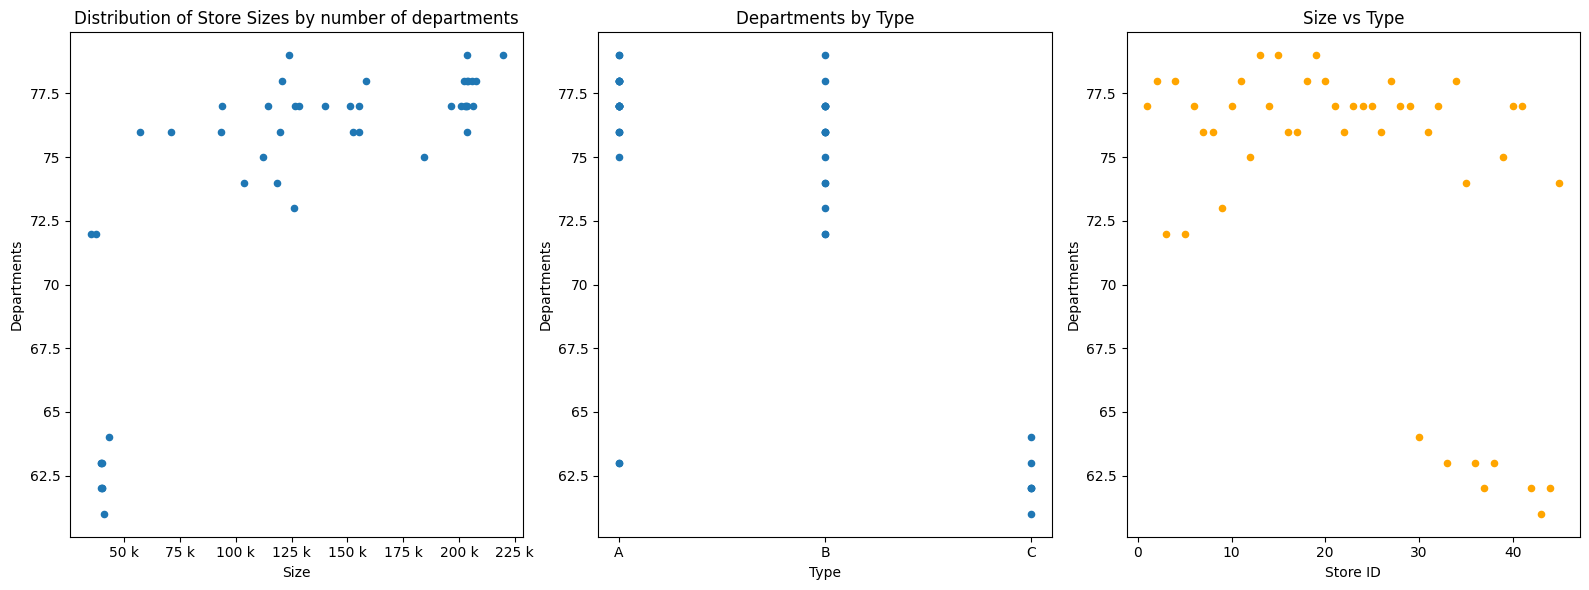

In [42]:
# Graphs from Stores enhanced with number of departments
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

stores_df.plot(kind='scatter', x='Size', y='Dept', ax=axes[0])
axes[0].set_title('Distribution of Store Sizes by number of departments')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Departments')
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())
axes[0].xaxis.set_major_formatter(ticker.EngFormatter())

stores_df.plot(kind='scatter', x='Type', y='Dept', ax=axes[1])
axes[1].set_title('Departments by Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Departments')
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())

stores_df.plot(kind='scatter', x='Store', y='Dept', ax=axes[2], color='orange')
axes[2].set_title('Size vs Type')
axes[2].set_xlabel('Store ID')
axes[2].set_ylabel('Departments')
axes[2].yaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()
plt.show()

## Observations Regarding the Stores Data

There are significantly less Type C stores than those of A or B.  
Store Type appears to be classified by Size with a few outliers in the A and B types.  
Type potentially could be reclassfied and this presents a future option.  
Type is related to the number of departments in a store - it is evident that at least 1 of the Type A stores should be reclassified to a Type C

# Append the Store Data into the Sales Data to enable groupby type and size also to look as sales by size

In [30]:
enhancedsales_df=pd.merge(sales_df, stores_df, how='left', on=['Store'])
enhancedsales_df.head()

Store  Dept_x       Date  Weekly_Sales  IsHoliday  SalesYear  SalesMonth  \
0      1       1 2010-02-05      24924.50      False       2010           2   
1      1       1 2010-02-12      46039.49       True       2010           2   
2      1       1 2010-02-19      41595.55      False       2010           2   
3      1       1 2010-02-26      19403.54      False       2010           2   
4      1       1 2010-03-05      21827.90      False       2010           3   

   SalesWeek  SalesYearMonth  SalesYearWeek Type    Size  Dept_y  
0          5          201002         201005    A  151315      77  
1          6          201002         201006    A  151315      77  
2          7          201002         201007    A  151315      77  
3          8          201002         201008    A  151315      77  
4          9          201003         201009    A  151315      77

In [31]:
# Add Sales/size of store to produce a normalised sales per sqft figure
enhancedsales_df['SalesPerSqFt']=enhancedsales_df['Weekly_Sales']/enhancedsales_df['Size']
enhancedsales_df.head()

Store  Dept_x       Date  Weekly_Sales  IsHoliday  SalesYear  SalesMonth  \
0      1       1 2010-02-05      24924.50      False       2010           2   
1      1       1 2010-02-12      46039.49       True       2010           2   
2      1       1 2010-02-19      41595.55      False       2010           2   
3      1       1 2010-02-26      19403.54      False       2010           2   
4      1       1 2010-03-05      21827.90      False       2010           3   

   SalesWeek  SalesYearMonth  SalesYearWeek Type    Size  Dept_y  SalesPerSqFt  
0          5          201002         201005    A  151315      77      0.164719  
1          6          201002         201006    A  151315      77      0.304263  
2          7          201002         201007    A  151315      77      0.274894  
3          8          201002         201008    A  151315      77      0.128233  
4          9          201003         201009    A  151315      77      0.144255

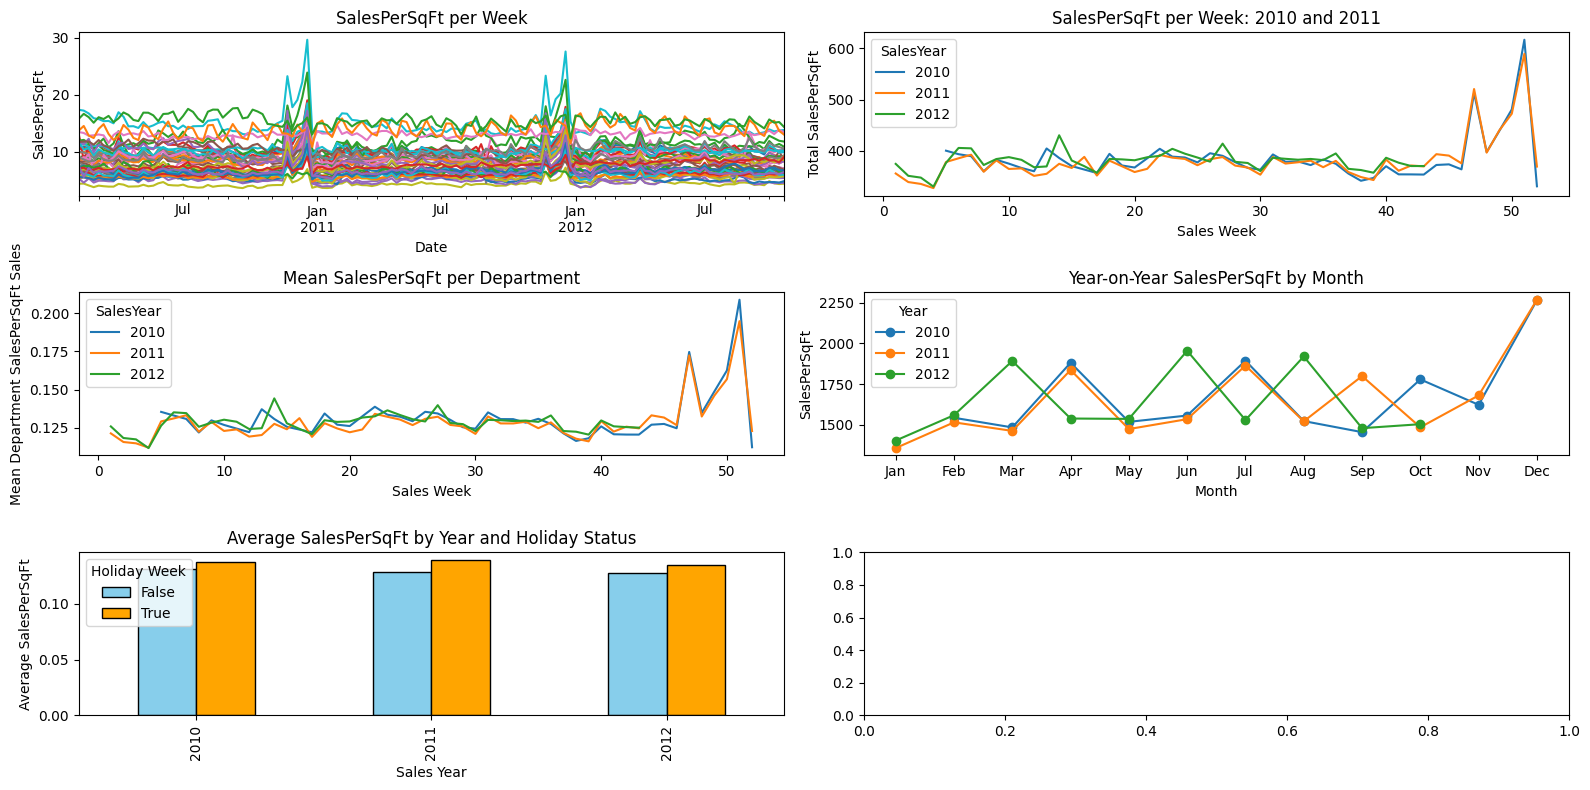

In [32]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

# First graph: Weekly sales over time
enhancedsales_df.groupby(['Store', 'Date' ]).SalesPerSqFt.sum().unstack(level=0).plot(
    kind='line',
    linestyle='solid',
    legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title('SalesPerSqFt per Week')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('SalesPerSqFt')

# Second graph: Total sales per week aggregated by SalesWeek
enhancedsales_df.groupby(['SalesYear', 'SalesWeek']).SalesPerSqFt.sum().unstack(level=0).plot(
    kind='line',
    linestyle='solid',
    legend=True,
    ax=axes[0, 1]
)
axes[0, 1].set_title('SalesPerSqFt per Week: 2010 and 2011')
axes[0, 1].set_xlabel('Sales Week')
axes[0, 1].set_ylabel('Total SalesPerSqFt')

# Third graph: Mean sales per week aggregated by SalesWeek
enhancedsales_df.groupby(['SalesYear', 'SalesWeek']).SalesPerSqFt.mean().unstack(level=0).plot(
    kind='line',
    linestyle='solid',
    legend=True,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Mean SalesPerSqFt per Department')
axes[1, 0].set_xlabel('Sales Week')
axes[1, 0].set_ylabel('Mean Department SalesPerSqFt Sales')

# Fourth graph: Year-on-year comparison of sales
# Group data by year and month, then aggregate sales
monthly_sales = enhancedsales_df.groupby(['SalesYear', 'SalesMonth']).SalesPerSqFt.sum().unstack(level=0)

# Plot one line per year
monthly_sales.plot(
    kind='line',
    ax=axes[1, 1],
    linestyle='solid',
    marker='o'  # Optional: Adds markers to the line
)

# Update x-axis with month names
axes[1, 1].set_xticks(range(1, 13))  # Months range from 1 to 12
axes[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add title and labels
axes[1, 1].set_title('Year-on-Year SalesPerSqFt by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('SalesPerSqFt')

# Add legend for years
axes[1, 1].legend(title='Year', loc='upper left')

# Fifth graph: Holiday vs Non Holiday
# Group data by year and Holiday, then aggregate sales
monthly_sales = enhancedsales_df.groupby(['IsHoliday', 'SalesYear']).SalesPerSqFt.mean().unstack(level=0)

monthly_sales.plot(
    kind='bar',
    ax=axes[2,0],
    color=['skyblue', 'orange'],  # Optional: Custom colors for bars
    edgecolor='black'            # Adds a border to the bars
)

# Add title and labels
axes[2,0].set_title('Average SalesPerSqFt by Year and Holiday Status')
axes[2,0].set_xlabel('Sales Year')
axes[2,0].set_ylabel('Average SalesPerSqFt')
axes[2,0].legend(title='Holiday Week', loc='upper left')



# Display the plots
plt.tight_layout()
plt.show()

## Observations on Sales Per Size

# Append the Features Data into the Enhanced Sales Data to enable groupby type and size also to look as sales by size

In [33]:
# Change date on features_df to a dateformat.
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
# merge enhanced and feature based on date and store
enhancedsales_df=pd.merge(enhancedsales_df, features_df, how='left', on=['Store','Date'])
enhancedsales_df.head()

Store  Dept_x       Date  Weekly_Sales  IsHoliday_x  SalesYear  SalesMonth  \
0      1       1 2010-02-05      24924.50        False       2010           2   
1      1       1 2010-02-12      46039.49         True       2010           2   
2      1       1 2010-02-19      41595.55        False       2010           2   
3      1       1 2010-02-26      19403.54        False       2010           2   
4      1       1 2010-03-05      21827.90        False       2010           3   

   SalesWeek  SalesYearMonth  SalesYearWeek  ... MarkDown1  MarkDown2  \
0          5          201002         201005  ...       0.0        0.0   
1          6          201002         201006  ...       0.0        0.0   
2          7          201002         201007  ...       0.0        0.0   
3          8          201002         201008  ...       0.0        0.0   
4          9          201003         201009  ...       0.0        0.0   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_y  \
0        0.0        0.0        0.0  211.096358         8.106        False   
1        0.0        0.0        0.0  211.242170         8.106         True   
2        0.0        0.0        0.0  211.289143         8.106        False   
3        0.0        0.0        0.0  211.319643         8.106        False   
4        0.0        0.0        0.0  211.350143         8.106        False   

   MarkDownTotal  MarkDownData  
0            0.0         False  
1            0.0         False  
2            0.0         False  
3            0.0         False  
4            0.0         False  

[5 rows x 26 columns]

In [34]:
#create a summary of sales per store per week
# function_dictionary = {'OrderID':'count','Quantity':'mean'}
salesaggregate = {'Weekly_Sales':'sum', 'SalesPerSqFt':'sum', 'Size': 'max', 'Temperature': 'max', 'Fuel_Price': 'max', 'Dept_x': 'max', 'Unemployment': 'max', 'IsHoliday_x': 'max', 'SalesYear': 'max', 'SalesWeek': 'max', 'SalesMonth': 'max', 'Type': 'first', 'CPI': 'max', 'MarkDownTotal': 'max', 'MarkDownData': 'max'}
storesalessummary = enhancedsales_df.groupby(['Store','Date'], as_index=False).agg(salesaggregate).reset_index()


storesalessummary['NonMarkedDownSales'] = storesalessummary['Weekly_Sales'] - storesalessummary['MarkDownTotal']
storesalessummary['PctSalesMarkedDown'] = storesalessummary['MarkDownTotal']/storesalessummary['Weekly_Sales']
storesalessummary['MD_PerSqFt'] = storesalessummary['MarkDownTotal']/storesalessummary['Size']
storesalessummary['NMDS_PerSqFt'] = storesalessummary['NonMarkedDownSales']/ storesalessummary['Size']

storesalessummary.head(5)

index  Store       Date  Weekly_Sales  SalesPerSqFt    Size  Temperature  \
0      0      1 2010-02-05    1643690.90     10.862710  151315        42.31   
1      1      1 2010-02-12    1641957.44     10.851254  151315        38.51   
2      2      1 2010-02-19    1611968.17     10.653063  151315        39.93   
3      3      1 2010-02-26    1409727.59      9.316509  151315        46.63   
4      4      1 2010-03-05    1554806.68     10.275298  151315        46.50   

   Fuel_Price  Dept_x  Unemployment  ...  SalesWeek  SalesMonth  Type  \
0       2.572      98         8.106  ...          5           2     A   
1       2.548      98         8.106  ...          6           2     A   
2       2.514      98         8.106  ...          7           2     A   
3       2.561      98         8.106  ...          8           2     A   
4       2.625      98         8.106  ...          9           3     A   

          CPI MarkDownTotal  MarkDownData  NonMarkedDownSales  \
0  211.096358           0.0         False          1643690.90   
1  211.242170           0.0         False          1641957.44   
2  211.289143           0.0         False          1611968.17   
3  211.319643           0.0         False          1409727.59   
4  211.350143           0.0         False          1554806.68   

   PctSalesMarkedDown  MD_PerSqFt  NMDS_PerSqFt  
0                 0.0         0.0     10.862710  
1                 0.0         0.0     10.851254  
2                 0.0         0.0     10.653063  
3                 0.0         0.0      9.316509  
4                 0.0         0.0     10.275298  

[5 rows x 22 columns]

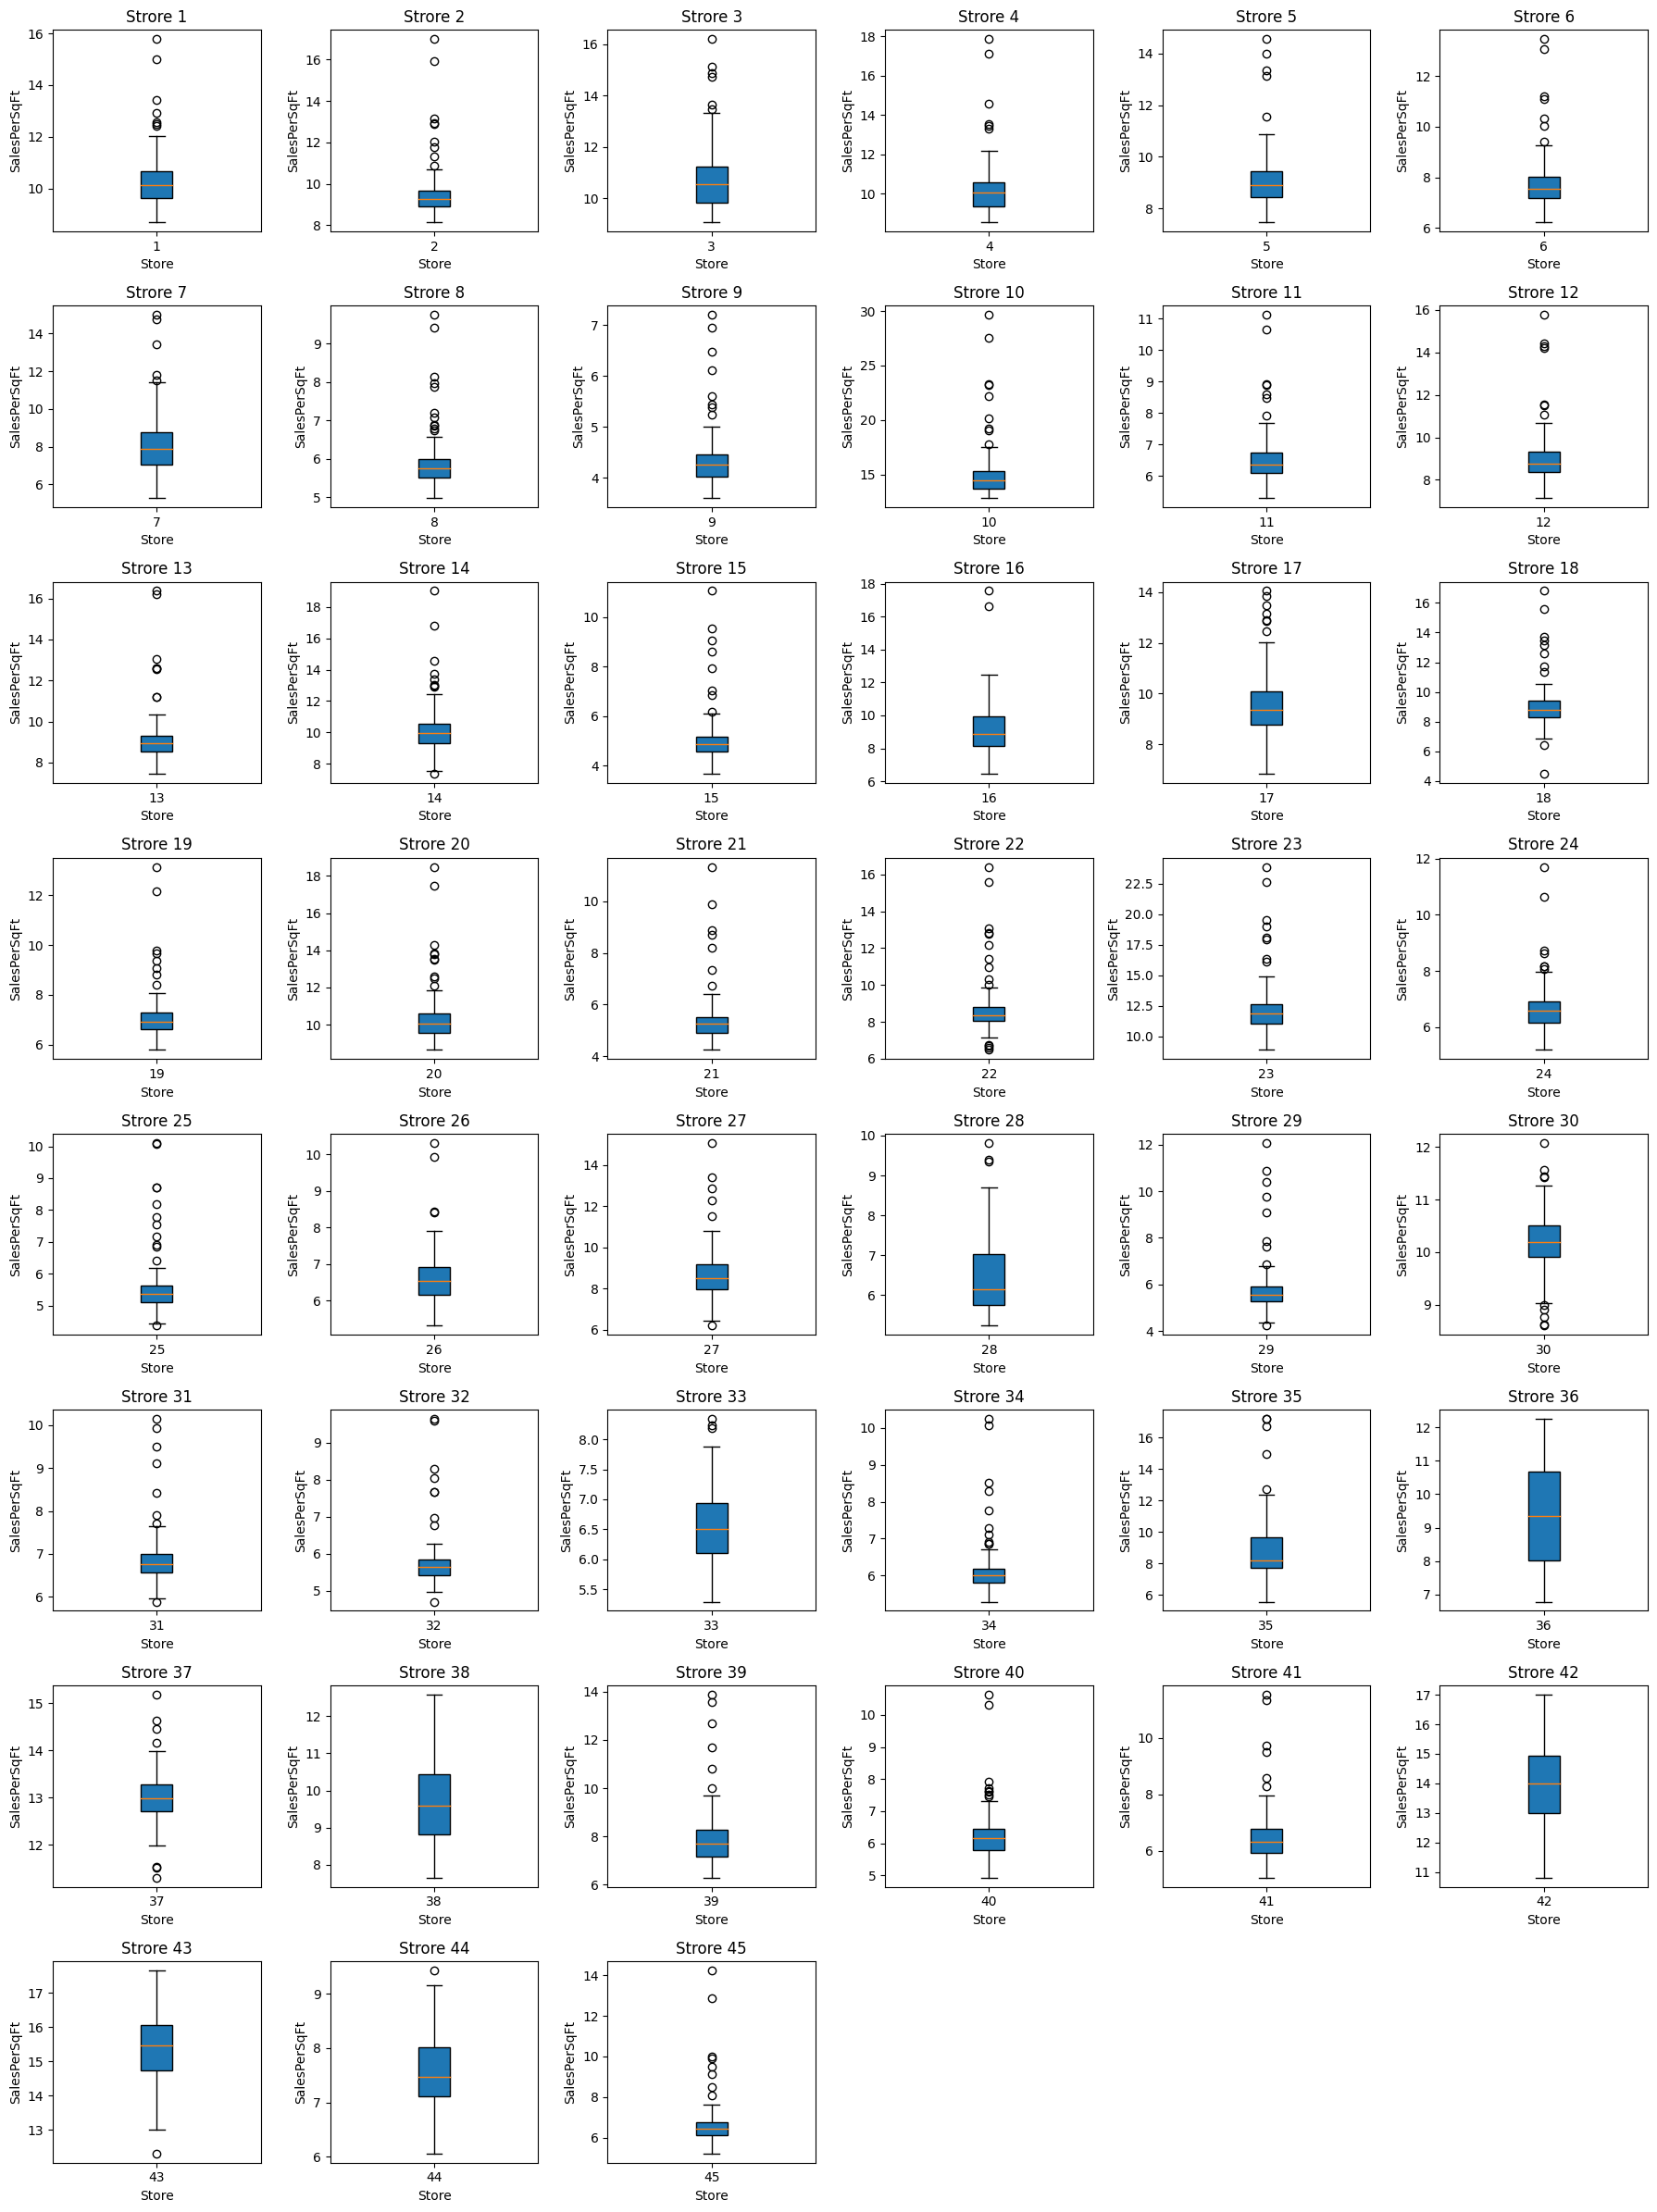

In [35]:
# ReRun Box and Whisker per store

# Get unique values in Store
unique_groups = storesalessummary['Store'].unique()

# Number of plots per row
plots_per_row = 6

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in Store and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = storesalessummary.loc[storesalessummary['Store'] == group, 'SalesPerSqFt'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Strore {group}')
    axes[idx].set_ylabel('SalesPerSqFt')
    axes[idx].set_xlabel('Store')

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.yscale('log')
plt.tight_layout()
plt.show()

## Observations on Sales By Store Type

Unsuprisingly the large stores on average have higher weekly sales both during Holiday and Non Holiday weeks.  
However Type C the smaller stores and Type B the Mid range stores - during non holiday weeks have higher Average Sales per Sq Ft than the larger Type A stores.  
During Holiday periods Type B Stores have a similar Average sales per sq ft at Type A but their distributed sales per sq ft are generally higher.  
Type C out performs both Type B and Type A in Sales Per Sq Ft during Holiday weeks.

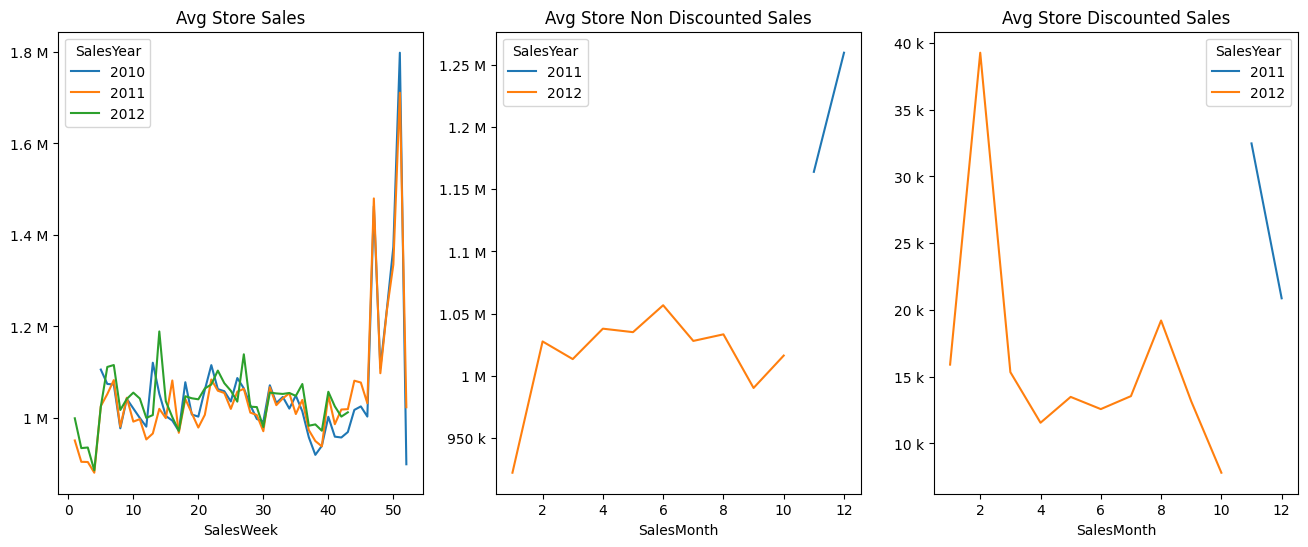

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

Weekly_storesalessummary = pd.pivot_table(storesalessummary, index ='SalesWeek', columns = 'SalesYear', values = 'Weekly_Sales', aggfunc='mean')
Weekly_storesalessummary.plot(ax=axes[0])
axes[0].set_title('Avg Store Sales')
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())
Weekly_storesalessummary2 = storesalessummary.query('MarkDownData == True').pivot_table(index ='SalesMonth', columns = 'SalesYear', values = 'NonMarkedDownSales', aggfunc='mean')
Weekly_storesalessummary2.plot(ax=axes[1])
axes[1].set_title('Avg Store Non Discounted Sales')
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())
Weekly_storesalessummary3 = storesalessummary.query('MarkDownData == True').pivot_table(index ='SalesMonth', columns = 'SalesYear', values = 'MarkDownTotal', aggfunc='mean')
Weekly_storesalessummary3.plot(ax=axes[2])
axes[2].set_title('Avg Store Discounted Sales')
axes[2].yaxis.set_major_formatter(ticker.EngFormatter())

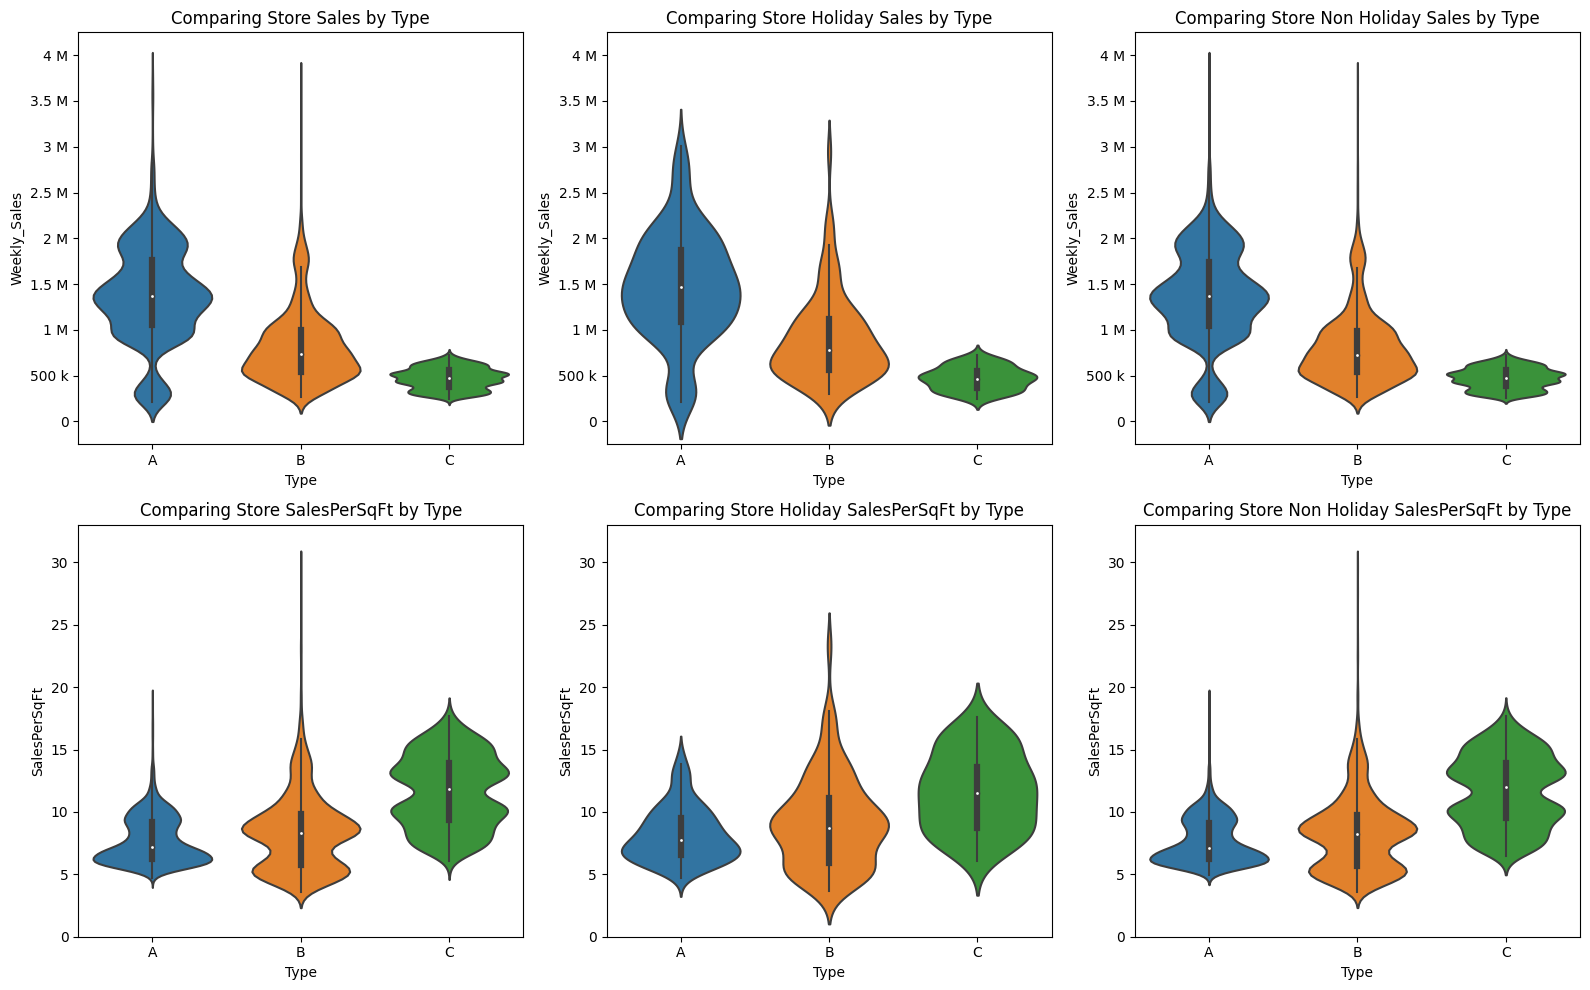

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# First plot
sns.violinplot(
    x='Type', y='Weekly_Sales', data=storesalessummary[['Weekly_Sales', 'Type']],
    ax=axes[0, 0], scale='width'  # Assign the specific subplot axis
)
axes[0, 0].set_title('Comparing Store Sales by Type')
axes[0, 0].set_ylim(-250000, 4250000)
axes[0, 0].yaxis.set_major_formatter(ticker.EngFormatter())
 

# Second plot
sns.violinplot(
    x='Type', y='SalesPerSqFt', data=storesalessummary[['SalesPerSqFt', 'Type']],
    ax=axes[1, 0], scale='width'  # Assign the specific subplot axis
)
axes[1, 0].set_title('Comparing Store SalesPerSqFt by Type')
axes[1, 0].set_ylim(0, 33) 
axes[1, 0].yaxis.set_major_formatter(ticker.EngFormatter())

# third plot = Weekly Sales for Holiday Weeks
sns.violinplot(
    x='Type', y='Weekly_Sales', data=storesalessummary.query('IsHoliday_x == True')[['Weekly_Sales', 'Type']],
    ax=axes[0, 1], scale='width'  # Assign the specific subplot axis
)
axes[0, 1].set_title('Comparing Store Holiday Sales by Type')
axes[0, 1].set_ylim(-250000, 4250000) 
axes[0, 1].yaxis.set_major_formatter(ticker.EngFormatter())

# Forth plot = Weekly SalesPerSqFt for Holiday Weeks
sns.violinplot(
    x='Type', y='SalesPerSqFt', data=storesalessummary.query('IsHoliday_x == True')[['SalesPerSqFt', 'Type']],
    ax=axes[1, 1], scale='width'  # Assign the specific subplot axis
)
axes[1, 1].set_title('Comparing Store Holiday SalesPerSqFt by Type')
axes[1, 1].set_ylim(0, 33)
axes[1, 1].yaxis.set_major_formatter(ticker.EngFormatter())

# fifth plot = Weekly Sales for Non Holiday Weeks
sns.violinplot(
    x='Type', y='Weekly_Sales', data=storesalessummary.query('IsHoliday_x == False')[['Weekly_Sales', 'Type']],
    ax=axes[0, 2], scale='width'  # Assign the specific subplot axis
)
axes[0, 2].set_title('Comparing Store Non Holiday Sales by Type')
axes[0, 2].set_ylim(-250000, 4250000) 
axes[0, 2].yaxis.set_major_formatter(ticker.EngFormatter())

# Six plot = Weekly SalesPerSqFt for Non Holiday Weeks
sns.violinplot(
    x='Type', y='SalesPerSqFt', data=storesalessummary.query('IsHoliday_x == False')[['SalesPerSqFt', 'Type']],
    ax=axes[1, 2], scale='width'  # Assign the specific subplot axis
)
axes[1, 2].set_title('Comparing Store Non Holiday SalesPerSqFt by Type')
axes[1, 2].set_ylim(0, 33)
axes[1, 2].yaxis.set_major_formatter(ticker.EngFormatter())

# Adjust layout
plt.tight_layout()
plt.show()

---

# Store and Department level performance information and Graphs.  

Using the sales_df at weekly sales per department level produce a set of visualisations to enable store managers to review store specific performance by department over time

In [38]:
# Calculate Delta fields for Weekly Sales both Year on Year and Week on Week, aslo create moving 13 week average.

# Add rolling 4 and 13 week total sales
sales_df['Dept_Roll_4wk_sales'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].rolling(4).sum()
sales_df['Dept_Roll_Qtr_sales'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].rolling(13).sum()

# week on week PCT change per store department
sales_df['Dept_weekly_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].pct_change(periods=1) * 100
# Year on Year PCT Change per store department
sales_df['Dept_yearly_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].pct_change(periods=53) * 100
# week on week PCT change per store department for 4 week rolling and 13 week rolling
sales_df['Dept_4wk_roll_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Dept_Roll_4wk_sales'].pct_change(periods=1) * 100
sales_df['Dept_13wk_roll_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Dept_Roll_Qtr_sales'].pct_change(periods=1) * 100

sales_df.head()


Store  Dept       Date  Weekly_Sales  IsHoliday  SalesYear  SalesMonth  \
0      1     1 2010-02-05      24924.50      False       2010           2   
1      1     1 2010-02-12      46039.49       True       2010           2   
2      1     1 2010-02-19      41595.55      False       2010           2   
3      1     1 2010-02-26      19403.54      False       2010           2   
4      1     1 2010-03-05      21827.90      False       2010           3   

   SalesWeek  SalesYearMonth  SalesYearWeek  Dept_Roll_4wk_sales  \
0          5          201002         201005                  NaN   
1          6          201002         201006                  NaN   
2          7          201002         201007                  NaN   
3          8          201002         201008            131963.08   
4          9          201003         201009            128866.48   

   Dept_Roll_Qtr_sales  Dept_weekly_Growth_Rate  Dept_yearly_Growth_Rate  \
0                  NaN                      NaN                      NaN   
1                  NaN                84.715802                      NaN   
2                  NaN                -9.652453                      NaN   
3                  NaN               -53.351885                      NaN   
4                  NaN                12.494421                      NaN   

   Dept_4wk_roll_Growth_Rate  Dept_13wk_roll_Growth_Rate  
0                        NaN                         NaN  
1                        NaN                         NaN  
2                        NaN                         NaN  
3                        NaN                         NaN  
4                  -2.346565                         NaN

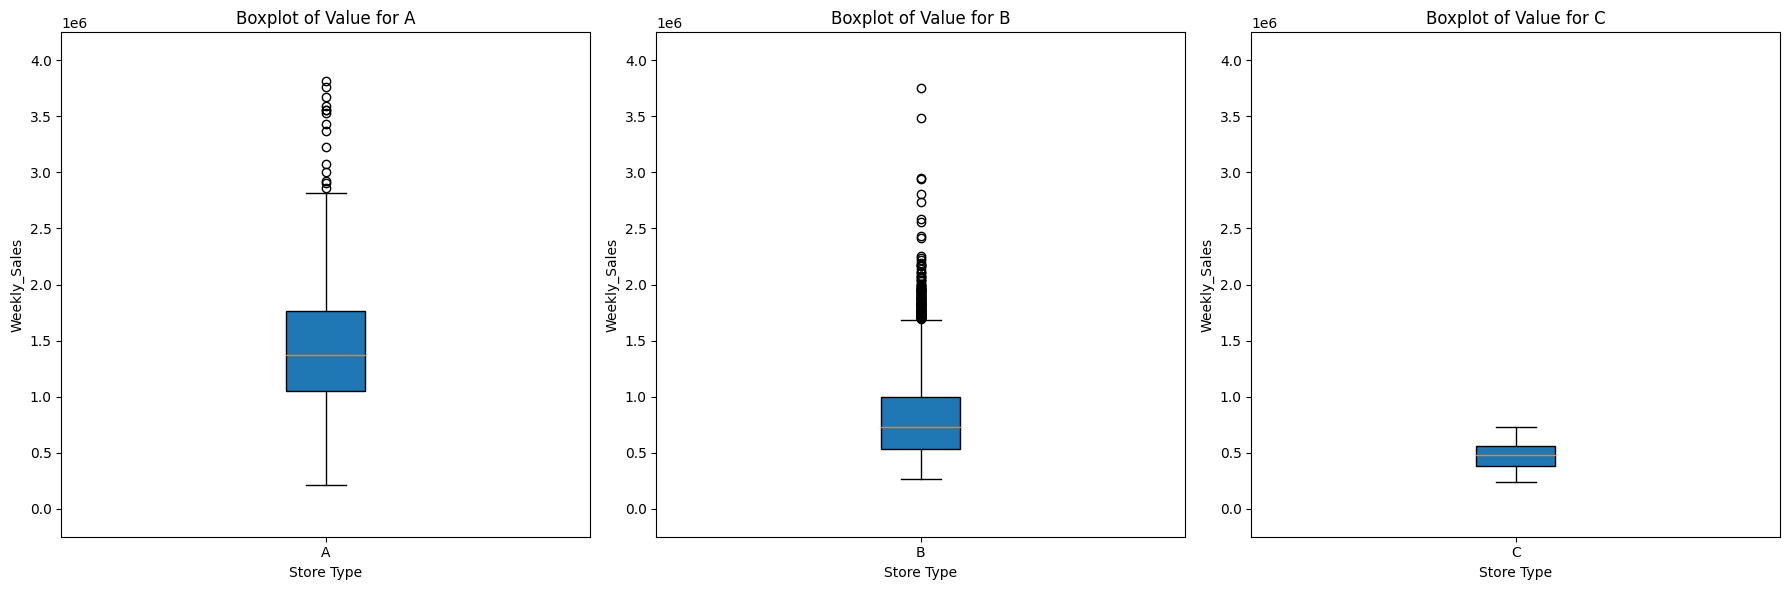

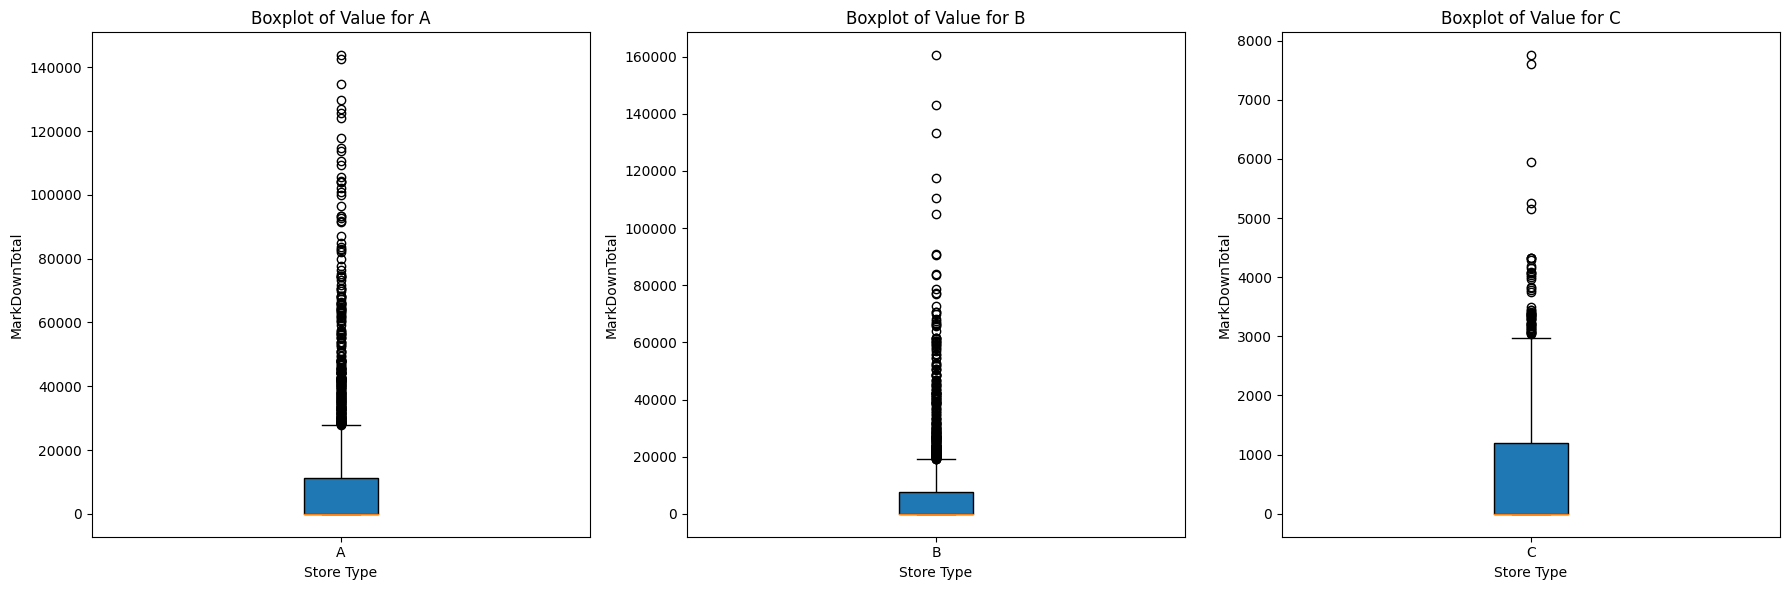

In [39]:
# Get unique values in Tyep_Group
unique_groups = storesalessummary['Type'].unique()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in type_Group and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = storesalessummary.loc[storesalessummary['Type'] == group, 'Weekly_Sales'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Boxplot of Value for {group}')
    axes[idx].set_ylabel('Weekly_Sales')
    axes[idx].set_xlabel('Store Type')
    axes[idx].set_ylim(-250000 , 4250000)

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Get unique values in RegEntity_Group
unique_groups = storesalessummary['Type'].unique()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in RegEntity_Group and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = storesalessummary.loc[storesalessummary['Type'] == group, 'MarkDownTotal'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Boxplot of Value for {group}')
    axes[idx].set_ylabel('MarkDownTotal')
    axes[idx].set_xlabel('Store Type')

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

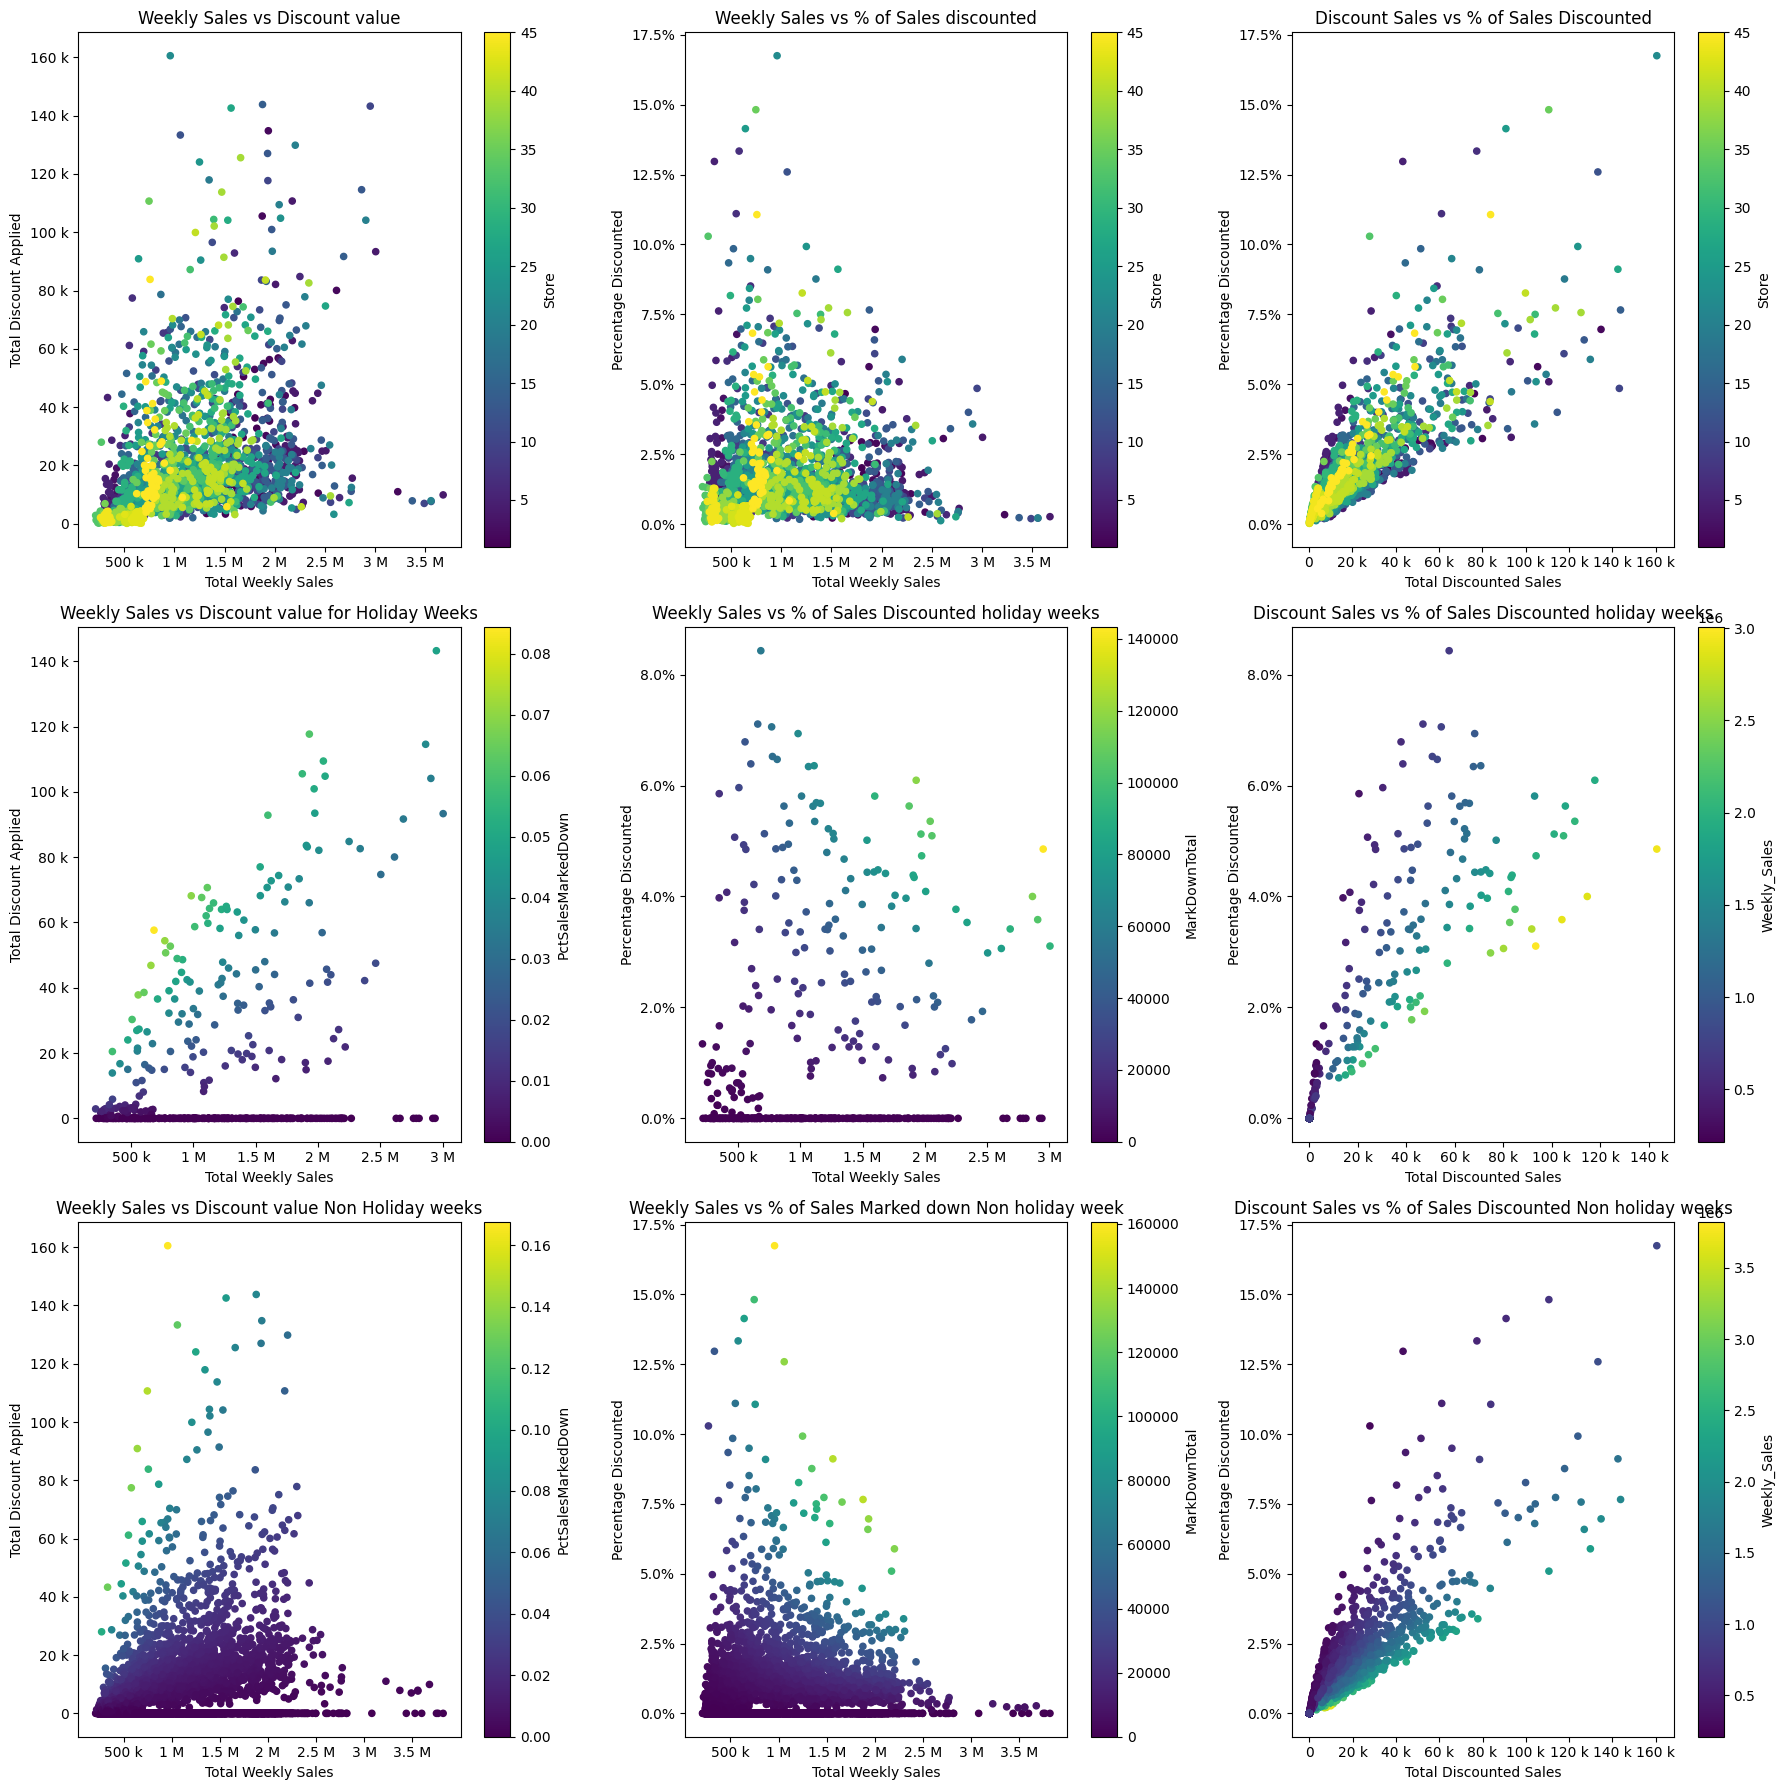

In [40]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

storesalessummary.query('MarkDownTotal >0').plot(kind='scatter', x='Weekly_Sales', y='MarkDownTotal', c='Store', colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Weekly Sales vs Discount value')
axes[0, 0].set_ylabel('Total Discount Applied')
axes[0, 0].set_xlabel('Total Weekly Sales')
axes[0, 0].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0, 0].yaxis.set_major_formatter(ticker.EngFormatter())

storesalessummary.query('MarkDownTotal >0').plot(kind='scatter', x='Weekly_Sales', y='PctSalesMarkedDown', c='Store', colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Weekly Sales vs % of Sales discounted')
axes[0, 1].set_ylabel('Percentage Discounted')
axes[0, 1].set_xlabel('Total Weekly Sales')
axes[0, 1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0, 1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax =1))

storesalessummary.query('MarkDownTotal >0').plot(kind='scatter', x='MarkDownTotal', y='PctSalesMarkedDown', c='Store', colormap='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Discount Sales vs % of Sales Discounted')
axes[0, 2].set_ylabel('Percentage Discounted')
axes[0, 2].set_xlabel('Total Discounted Sales')
axes[0, 2].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0, 2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax =1))

storesalessummary.query('IsHoliday_x == True').plot(kind='scatter', x='Weekly_Sales', y='MarkDownTotal', c='PctSalesMarkedDown', colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Weekly Sales vs Discount value for Holiday Weeks')
axes[1, 0].set_ylabel('Total Discount Applied')
axes[1, 0].set_xlabel('Total Weekly Sales')
axes[1, 0].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1, 0].yaxis.set_major_formatter(ticker.EngFormatter())

storesalessummary.query('IsHoliday_x == True').plot(kind='scatter', x='Weekly_Sales', y='PctSalesMarkedDown', c='MarkDownTotal', colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Weekly Sales vs % of Sales Discounted holiday weeks')
axes[1, 1].set_ylabel('Percentage Discounted')
axes[1, 1].set_xlabel('Total Weekly Sales')
axes[1, 1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1, 1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax =1))


storesalessummary.query('IsHoliday_x == True').plot(kind='scatter', x='MarkDownTotal', y='PctSalesMarkedDown', c='Weekly_Sales', colormap='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Discount Sales vs % of Sales Discounted holiday weeks')
axes[1, 2].set_ylabel('Percentage Discounted')
axes[1, 2].set_xlabel('Total Discounted Sales')
axes[1, 2].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1, 2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax =1))

storesalessummary.query('IsHoliday_x == False').plot(kind='scatter', x='Weekly_Sales', y='MarkDownTotal', c='PctSalesMarkedDown', colormap='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Weekly Sales vs Discount value Non Holiday weeks')
axes[2, 0].set_ylabel('Total Discount Applied')
axes[2, 0].set_xlabel('Total Weekly Sales')
axes[2, 0].xaxis.set_major_formatter(ticker.EngFormatter())
axes[2, 0].yaxis.set_major_formatter(ticker.EngFormatter())

storesalessummary.query('IsHoliday_x == False').plot(kind='scatter', x='Weekly_Sales', y='PctSalesMarkedDown', c='MarkDownTotal', colormap='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Weekly Sales vs % of Sales Marked down Non holiday week')
axes[2, 1].set_ylabel('Percentage Discounted')
axes[2, 1].set_xlabel('Total Weekly Sales')
axes[2, 1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[2, 1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax =1))

storesalessummary.query('IsHoliday_x == False').plot(kind='scatter', x='MarkDownTotal', y='PctSalesMarkedDown', c='Weekly_Sales', colormap='viridis', ax=axes[2, 2])
axes[2, 2].set_title('Discount Sales vs % of Sales Discounted Non holiday weeks')
axes[2, 2].set_ylabel('Percentage Discounted')
axes[2, 2].set_xlabel('Total Discounted Sales')
axes[2, 2].xaxis.set_major_formatter(ticker.EngFormatter())
axes[2, 2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax =1))

plt.tight_layout()
plt.show()

## Improve graphs by adding trend Line

Using plotly express to provide enhanced graphs.

In [71]:
# Import Plotly Express

import plotly.express as px
fig = px.scatter(storesalessummary, y="Temperature", x="Weekly_Sales", color="Type", marginal_y="box", marginal_x="box", trendline="ols")
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
)
fig.show()



In [74]:

data1 = storesalessummary.query('MarkDownTotal >0')
fig = px.scatter(data1, x='Weekly_Sales', y='MarkDownTotal', color="Store", marginal_y="box", marginal_x="box", trendline="ols", title="Weekly Sales by Total Discounted Sales")
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
)
fig.show()


fig2 = px.scatter(data1, x='Weekly_Sales', y='PctSalesMarkedDown', color="Store", marginal_y="box", marginal_x="box", trendline="ols", title="Weekly Sales by Percentage of Sales Discounted")
fig2.update_layout(
    autosize=False,
    width=1200,
    height=600,
)
fig2.show()

fig3 = px.scatter_matrix(data_frame=storesalessummary,
                        dimensions=["Store", "Dept_x", "PctSalesMarkedDown", "Weekly_Sales"],
                        color="Type", title="Scatter Matrix"
                        )
fig3.update_layout(
    autosize=False,
    width=1200,
    height=1200,
)                       

fig3.show()


## Observations on relationships Between Weekly Sales, Total Discounted Sales and Percentage Discount Represented

There appears to be a direct correlation between the size of the Percentage Discount applied and the volume of Discount Sales.  
There is also a positive correlation between Total Sales and Percentage Discount applied.  This suggests that the greater the discount on sales the greater overall sales are.  

Both of these observations are true for both Holiday and Non Holiday weeks.



## Enhanced Visualisations using Plotly

Look at the usefulness of a Treemap to identify relationships between various factors.

In [64]:
# Import Plotly Express
import plotly.express as px

fig = px.treemap(data_frame=storesalessummary, path=['SalesYear','SalesMonth','Type'], values='Weekly_Sales',
                  color='Weekly_Sales', hover_name='Store', hover_data=['Store'], title="Weekly Sales by Year, Month and Store Type")
fig.show()


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusion and Next Steps

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.